# Reading AE data

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

%matplotlib inline

## Importing the required libraries:

### Sample characteristics:

In [2]:
radius_meters = .99/2 * 25.4 * 0.001 
length_meters = 1.985 * 25.4 * 0.001 # 2.02 for saied

sample = 'Berea_TS7' # 'Berea_TS7' 'smcva13'

<div class="alert alert-block alert-info">
<b>Tip:</b> Read in all the triggered files, make sure there is only .asd files.
</div>


### Reading all AE files from the path

In [2]:
path = 'C:/Downloads/TRANSFER/'

# read all files, or read them in batches using string split to read file number
my_files = []
for file in os.listdir(path):
# 2 or 4 after string split in lines below depends on number of underscores
#    if file.endswith(".asd") and int(file.split('_')[2][:-4])>44953: # Saied's file
    if file.endswith(".asd"):# and 50000<int(file.split('_')[4][:-4])<=55000:
        my_files.append(path+file)

In [3]:
my_files[0]

'C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50001.asd'

In [4]:
len(my_files)

5000

### Checking the recorded time from one file.

In [5]:
file_path = my_files[0]

with open(file_path, "r") as f:
    record_time = f.readlines()[0]
    
record_time_cut = record_time[20:30]

print(record_time)
print(record_time_cut)

H1 = (record_time_cut.replace(':',' ').split())
H2 = list(map(float, H1[0:3]))

if H1[3] == "PM":
    record_time = (H2[0] + 12)*3600 + H2[1]*60 + H2[2]
else:
    record_time = (H2[0])*3600 + H2[1]*60 + H2[2]
    
print("numeric record time:", record_time)

Starttime	9/10/2021 12:34:42 PM

12:34:42 P
numeric record time: 45282.0


### Checking the trigger time from one file.

In [6]:
with open(file_path, "r") as f:    
    trigger_time = f.readlines()[1]
    
trigger_time_cut = trigger_time[12:30]
print(trigger_time)
print(trigger_time_cut)    

H1 = trigger_time_cut.replace(":", " ").replace(".", " ").split()
H2 = list(map(float, H1[0:4]))
trigger_time = (H2[0])*3600 + H2[1]*60 + H2[2] + H2[3] / (10**9)
print(trigger_time)

Triggertime	12:58:31.564474849999897 

12:58:31.564474849
46711.564474849


## Reading in all trigger files

In [7]:
trigger_times = []
indices = []

for index, file in enumerate(my_files):
    with open(file, "r") as f:    
        trigger_time = f.readlines()[1]
        trigger_time_cut = trigger_time[12:30]
        H1 = trigger_time_cut.replace(":", " ").replace(".", " ").split()
        H2 = list(map(float, H1[0:4]))
        trigger_time = (H2[0])*3600 + H2[1]*60 + H2[2] + H2[3] / (10**9)
        trigger_times.append(trigger_time)
        indices.append(index)

In [8]:
X = np.array(trigger_times)-record_time
X.shape

(5000,)

## Making a dataframe out of triggered events:

In [11]:
# Only keep the data within larger than 250 usec gap:
df_trigger_times = pd.DataFrame({"evnt_index": indices, "file_name": my_files, "trigger_time": trigger_times})
df_trigger_times["trigger_time_zeroed"] = X
df_trigger_times = df_trigger_times.sort_values(by = "trigger_time")

file_path = "datasets/a_python_processed/"+sample+"_df_trigger_times_raw.csv"
df_trigger_times.to_csv(file_path, index=False)
df_trigger_times

evnt_index                                         file_name  \
0              0  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50001.asd   
1              1  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50002.asd   
2              2  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50003.asd   
3              3  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50004.asd   
4              4  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_50005.asd   
...          ...                                               ...   
4995        4995  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_54996.asd   
4996        4996  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_54997.asd   
4997        4997  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_54998.asd   
4998        4998  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_54999.asd   
4999        4999  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_55000.asd   

      trigger_time  trigger_time_zeroed  
0     46711.564475          1429.564475  
1     46711.564476          1429.564476  
2     46711.564482          1429.564482  
3     46711.565006          1429.565006  
4     46711.565129          1429.565129  
...            ...                  ...  
4995  46712.016978          1430.016978  
4996  46712.017181          1430.017181  
4997  46712.017186          1430.017186  
4998  46712.017188          1430.017188  
4999  46712.017189          1430.017189  

[5000 rows x 4 columns]

## Reading in the dataframe that was saved in the previous cell (this step was made to manipulate dataframe during notebook experimentation):

In [4]:
file_path = "datasets/a_python_processed/"+sample+"_df_trigger_times_raw.csv"

df_trigger_times = pd.read_csv(file_path)
df_trigger_times.head()

evnt_index                                       file_name  trigger_time  \
0           0  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_001.asd  45463.408516   
1           1  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_002.asd  45564.699379   
2           2  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_003.asd  45564.699381   
3           3  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_004.asd  45931.569987   
4           4  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_005.asd  45946.250932   

   trigger_time_zeroed  
0           181.408516  
1           282.699379  
2           282.699381  
3           649.569987  
4           664.250932

## Keeping only event that are more than 250 usec apart, as many trigger windows refer to the same event (during ECR recording on Elsys):

In [5]:
df_trigger_times["diff_trig"] = df_trigger_times["trigger_time_zeroed"].diff()
df_trigger_times = df_trigger_times[df_trigger_times["diff_trig"] > (250 * 10**-6)]
df_trigger_times.reset_index(drop=True, inplace=True)
print(df_trigger_times.head())
df_trigger_times.shape

   evnt_index                                       file_name  trigger_time  \
0           1  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_002.asd  45564.699379   
1           3  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_004.asd  45931.569987   
2           4  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_005.asd  45946.250932   
3           5  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_006.asd  45968.395854   
4           7  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_008.asd  46012.258583   

   trigger_time_zeroed   diff_trig  
0           282.699379  101.290863  
1           649.569987  366.870605  
2           664.250932   14.680945  
3           686.395854   22.144922  
4           730.258583   43.862723  


(24106, 5)

### Plotting the AE numbers

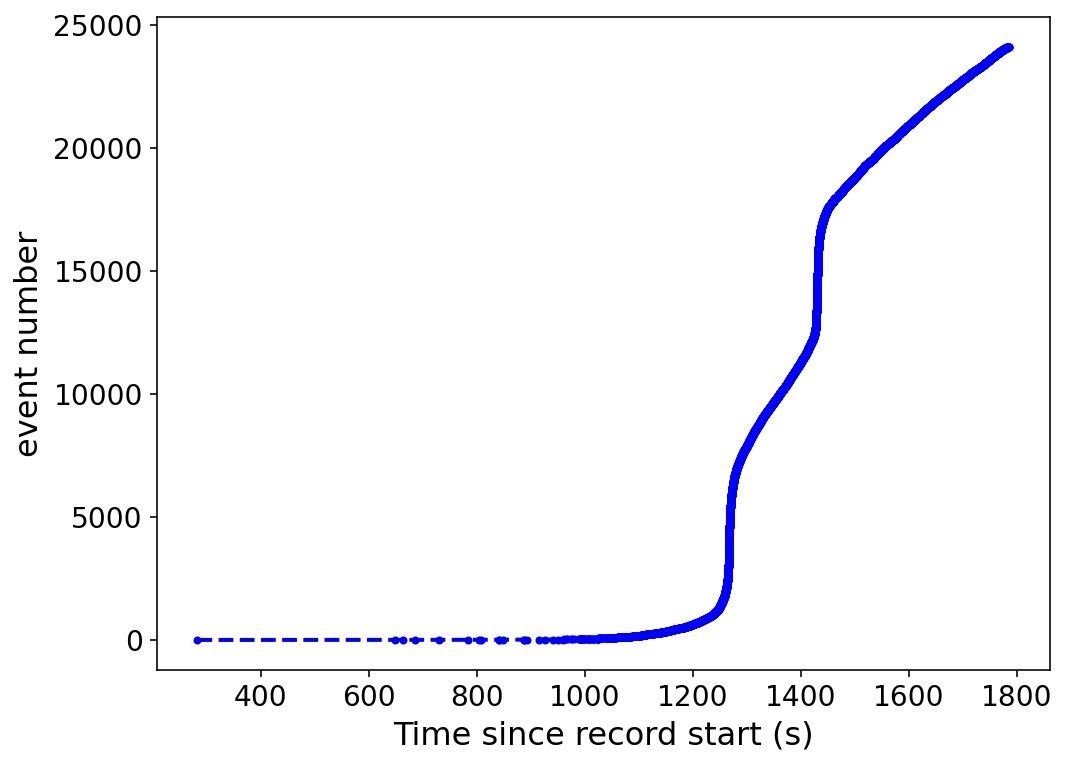

In [6]:
%config InlineBackend.figure_formats = set(['retina'])

plt.figure(figsize = (8, 6))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(
         df_trigger_times["trigger_time_zeroed"],
        df_trigger_times.index, 
         'bo--', linewidth=2, markersize=3)

plt.xlabel("Time since record start (s)", fontsize = 16)
plt.ylabel("event number", fontsize = 16);

## Create flag for active pulses

In [7]:
flags = np.zeros((len(df_trigger_times),),dtype=int)

for i,f in enumerate(df_trigger_times['file_name']): 

    df = pd.read_csv(f, sep="\t", header=9)
    df.columns = ["time", 'sen1_v','sen2_v','sen3_v','sen4_v','sen5_v', 'sen6_v', 'sen7_v',
                  'sen8_v', 'sen9_v', 'sen10_v', 'pulse']
    if np.max(df.pulse)>0.1:
        flags[i] = 1

df_trigger_times['pulse_flag'] = flags

df_trigger_times.head()

evnt_index                                       file_name  trigger_time  \
0           1  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_002.asd  45564.699379   
1           3  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_004.asd  45931.569987   
2           4  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_005.asd  45946.250932   
3           5  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_006.asd  45968.395854   
4           7  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_008.asd  46012.258583   

   trigger_time_zeroed   diff_trig  pulse_flag  
0           282.699379  101.290863           0  
1           649.569987  366.870605           0  
2           664.250932   14.680945           0  
3           686.395854   22.144922           0  
4           730.258583   43.862723           0

In [8]:
df_trigger_times["pulse_flag"].value_counts()

0    24105
1        1
Name: pulse_flag, dtype: int64

In [83]:
print(df_trigger_times[df_trigger_times.pulse_flag==1])

    evnt_index                                       file_name  trigger_time  \
76        6315  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_156.asd  46325.213799   

    trigger_time_zeroed  diff_trig  pulse_flag  
76          1043.213799   0.794817           1  


## Define bandpass filter

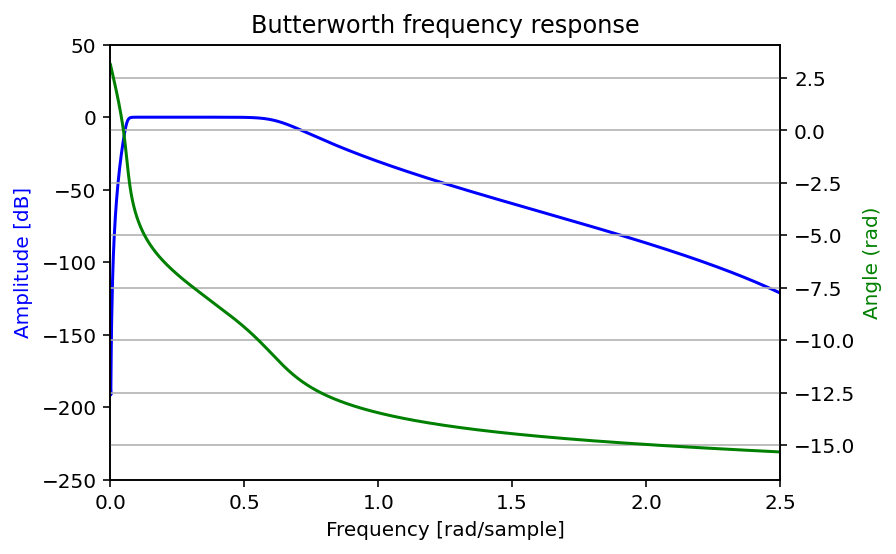

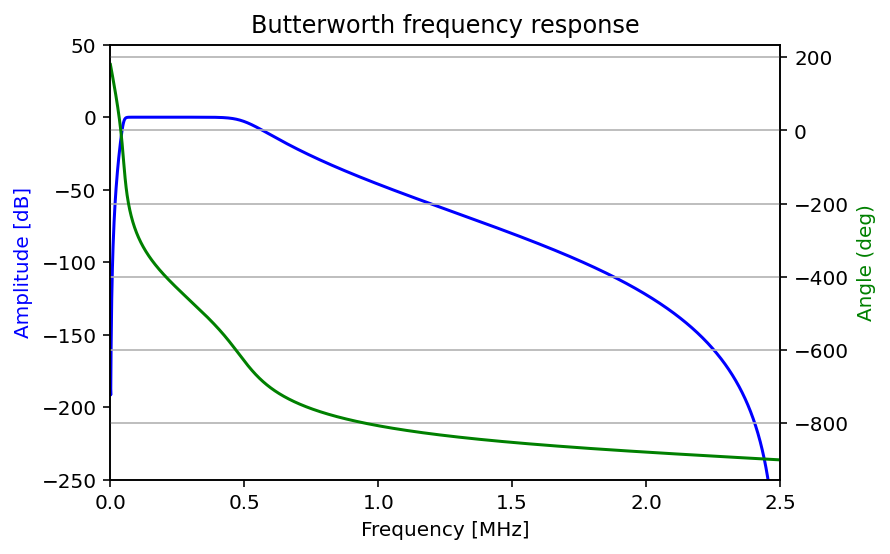

In [9]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz

# Source: https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# plotting frequency response of filter

fs = 5 * 10**6
lowcut = 50 * 10**3
highcut = 500 * 10**3
b, a = butter_bandpass(lowcut, highcut, fs, order=6)
w, h = freqz(b, a, worN=2000)

fr=fs*w/2/np.pi / 10**6 # freq in MHz

fig, ax1 = plt.subplots()
ax1.set_title('Butterworth frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (rad)', color='g')
ax2.grid()
ax2.axis('tight')
plt.xlim([0, 2.5])
ax1.set_ylim(-250, 50)
plt.show()

fig, ax1 = plt.subplots()
ax1.set_title('Butterworth frequency response')
ax1.plot(fr, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [MHz]')
ax2 = ax1.twinx()
degs = np.unwrap(np.angle(h)) * (180/np.pi)
ax2.plot(fr, degs, 'g')
ax2.set_ylabel('Angle (deg)', color='g')
ax2.grid()
ax2.axis('tight')
plt.xlim([0, 2.5])
ax1.set_ylim(-250, 50)
plt.show()

## Check filter for one event (chosen with 'ind')

In [73]:
from scipy.fft import fft, fftfreq

ind = 11840 #13840 780
file_name = df_trigger_times["file_name"][ind]
print(file_name)
df = pd.read_csv(file_name, sep="\t", header=9)
df.columns = ["time", 'sen1_v','sen2_v','sen3_v','sen4_v','sen5_v', 'sen6_v', 'sen7_v',
              'sen8_v', 'sen9_v', 'sen10_v', 'pulse']

# number of points
N = len(df['time'])
# spacing
T = df['time'].diff()[1]

x = df['time'].values
y = df['sen10_v'].values
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

z = butter_bandpass_filter(y, lowcut, highcut, fs, order=6)
zf = fft(z)

dfpx = pd.DataFrame(np.array([xf*1e-6,2.0/N*np.abs(yf[:N//2]),2.0/N*np.abs(zf[:N//2])]).T,
                    columns=['freq','raw','fft'])
dfpx = dfpx.set_index('freq')
display(dfpx.head(2))
px.line(data_frame=dfpx,range_x=[0,2.5],range_y=[0,.01],
        labels={'freq':'f (MHz)','raw':'Amplitude (V)','fft':'Amplitude (V)'})


C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_44134.asd


raw       fft
freq                        
0.000000  0.026583  0.000011
0.002002  0.000874  0.000011

## Plot curves for this event

In [83]:
# %config InlineBackend.figure_formats = set(['retina'])
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["xtick.labelsize"] = 20
# plt.rcParams["ytick.labelsize"] = 20

# fig, axs = plt.subplots(5, 2, figsize = (30, 30))

# def plot_sensors(sensor, row, col,lo,hi):

#     # Signal
#     x = df[sensor]
#     y = butter_bandpass_filter(x, lo, hi, 5e6, order=6)

#     axs[row, col].plot(df["time"]*1e6, y, color = "blue")
#     axs[row, col].set_xlabel("time (usec)")
#     axs[row, col].set_ylabel(sensor.split("_")[0]);
#     axs[row, col].set_ylim([-1, 1])
#     axs[row, col].set_xlim([-50, 200])

# plot_sensors("sen1_v", 0, 0,lowcut,highcut)
# plot_sensors("sen2_v", 0, 1,lowcut,highcut)
# plot_sensors("sen3_v", 1, 0,lowcut,highcut)
# plot_sensors("sen4_v", 1, 1,lowcut,highcut)
# plot_sensors("sen5_v", 2, 0,lowcut,highcut)
# plot_sensors("sen6_v", 2, 1,lowcut,highcut)
# plot_sensors("sen7_v", 3, 0,lowcut,highcut)
# plot_sensors("sen8_v", 3, 1,lowcut,highcut)
# plot_sensors("sen9_v", 4, 0,lowcut,highcut)
# plot_sensors("sen10_v", 4, 1,lowcut,highcut)
# plt.savefig('ae_signals.jpg')
# plt.tight_layout()

df_filtered = df.iloc[:,:-1].copy()
df_filtered['time'] *= 1e6
df_filtered = df_filtered.set_index('time')
for c in df_filtered.columns:
    x = df_filtered[c]
    y = butter_bandpass_filter(x,lowcut,highcut,5e6,order=6)
    df_filtered[c] = y
    
px.line(data_frame=df_filtered,range_x=[-50,200],range_y=[-1,1])



## Trying out autopicks on the traces above

C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_44134.asd
>035 (p=1) or p!=1,  0 0.4335937499999969
>035 (p=1) or p!=1,  1 0.0390625
>035 (p=1) or p!=1,  2 0.28125
>035 (p=1) or p!=1,  3 1.1531250000000015
>035 (p=1) or p!=1,  4 0.1671874999999976
>035 (p=1) or p!=1,  5 0.1265624999999986
>035 (p=1) or p!=1,  6 0.1578124999999984
>035 (p=1) or p!=1,  7 0.1484374999999996
>035 (p=1) or p!=1,  8 0.2000000000000028
>035 (p=1) or p!=1,  9 0.2937499999999962

Picks for sensors 1-10:  [0.002, nan, 0.0032, -0.0044, 0.0042, nan, 0.002, 0.0086, 0.0006, -0.0008]
AIC_amp:  [148.6, nan, 485.4, 877.1, 279.7, nan, 82.2, 446.2, 423.9, 746.8]



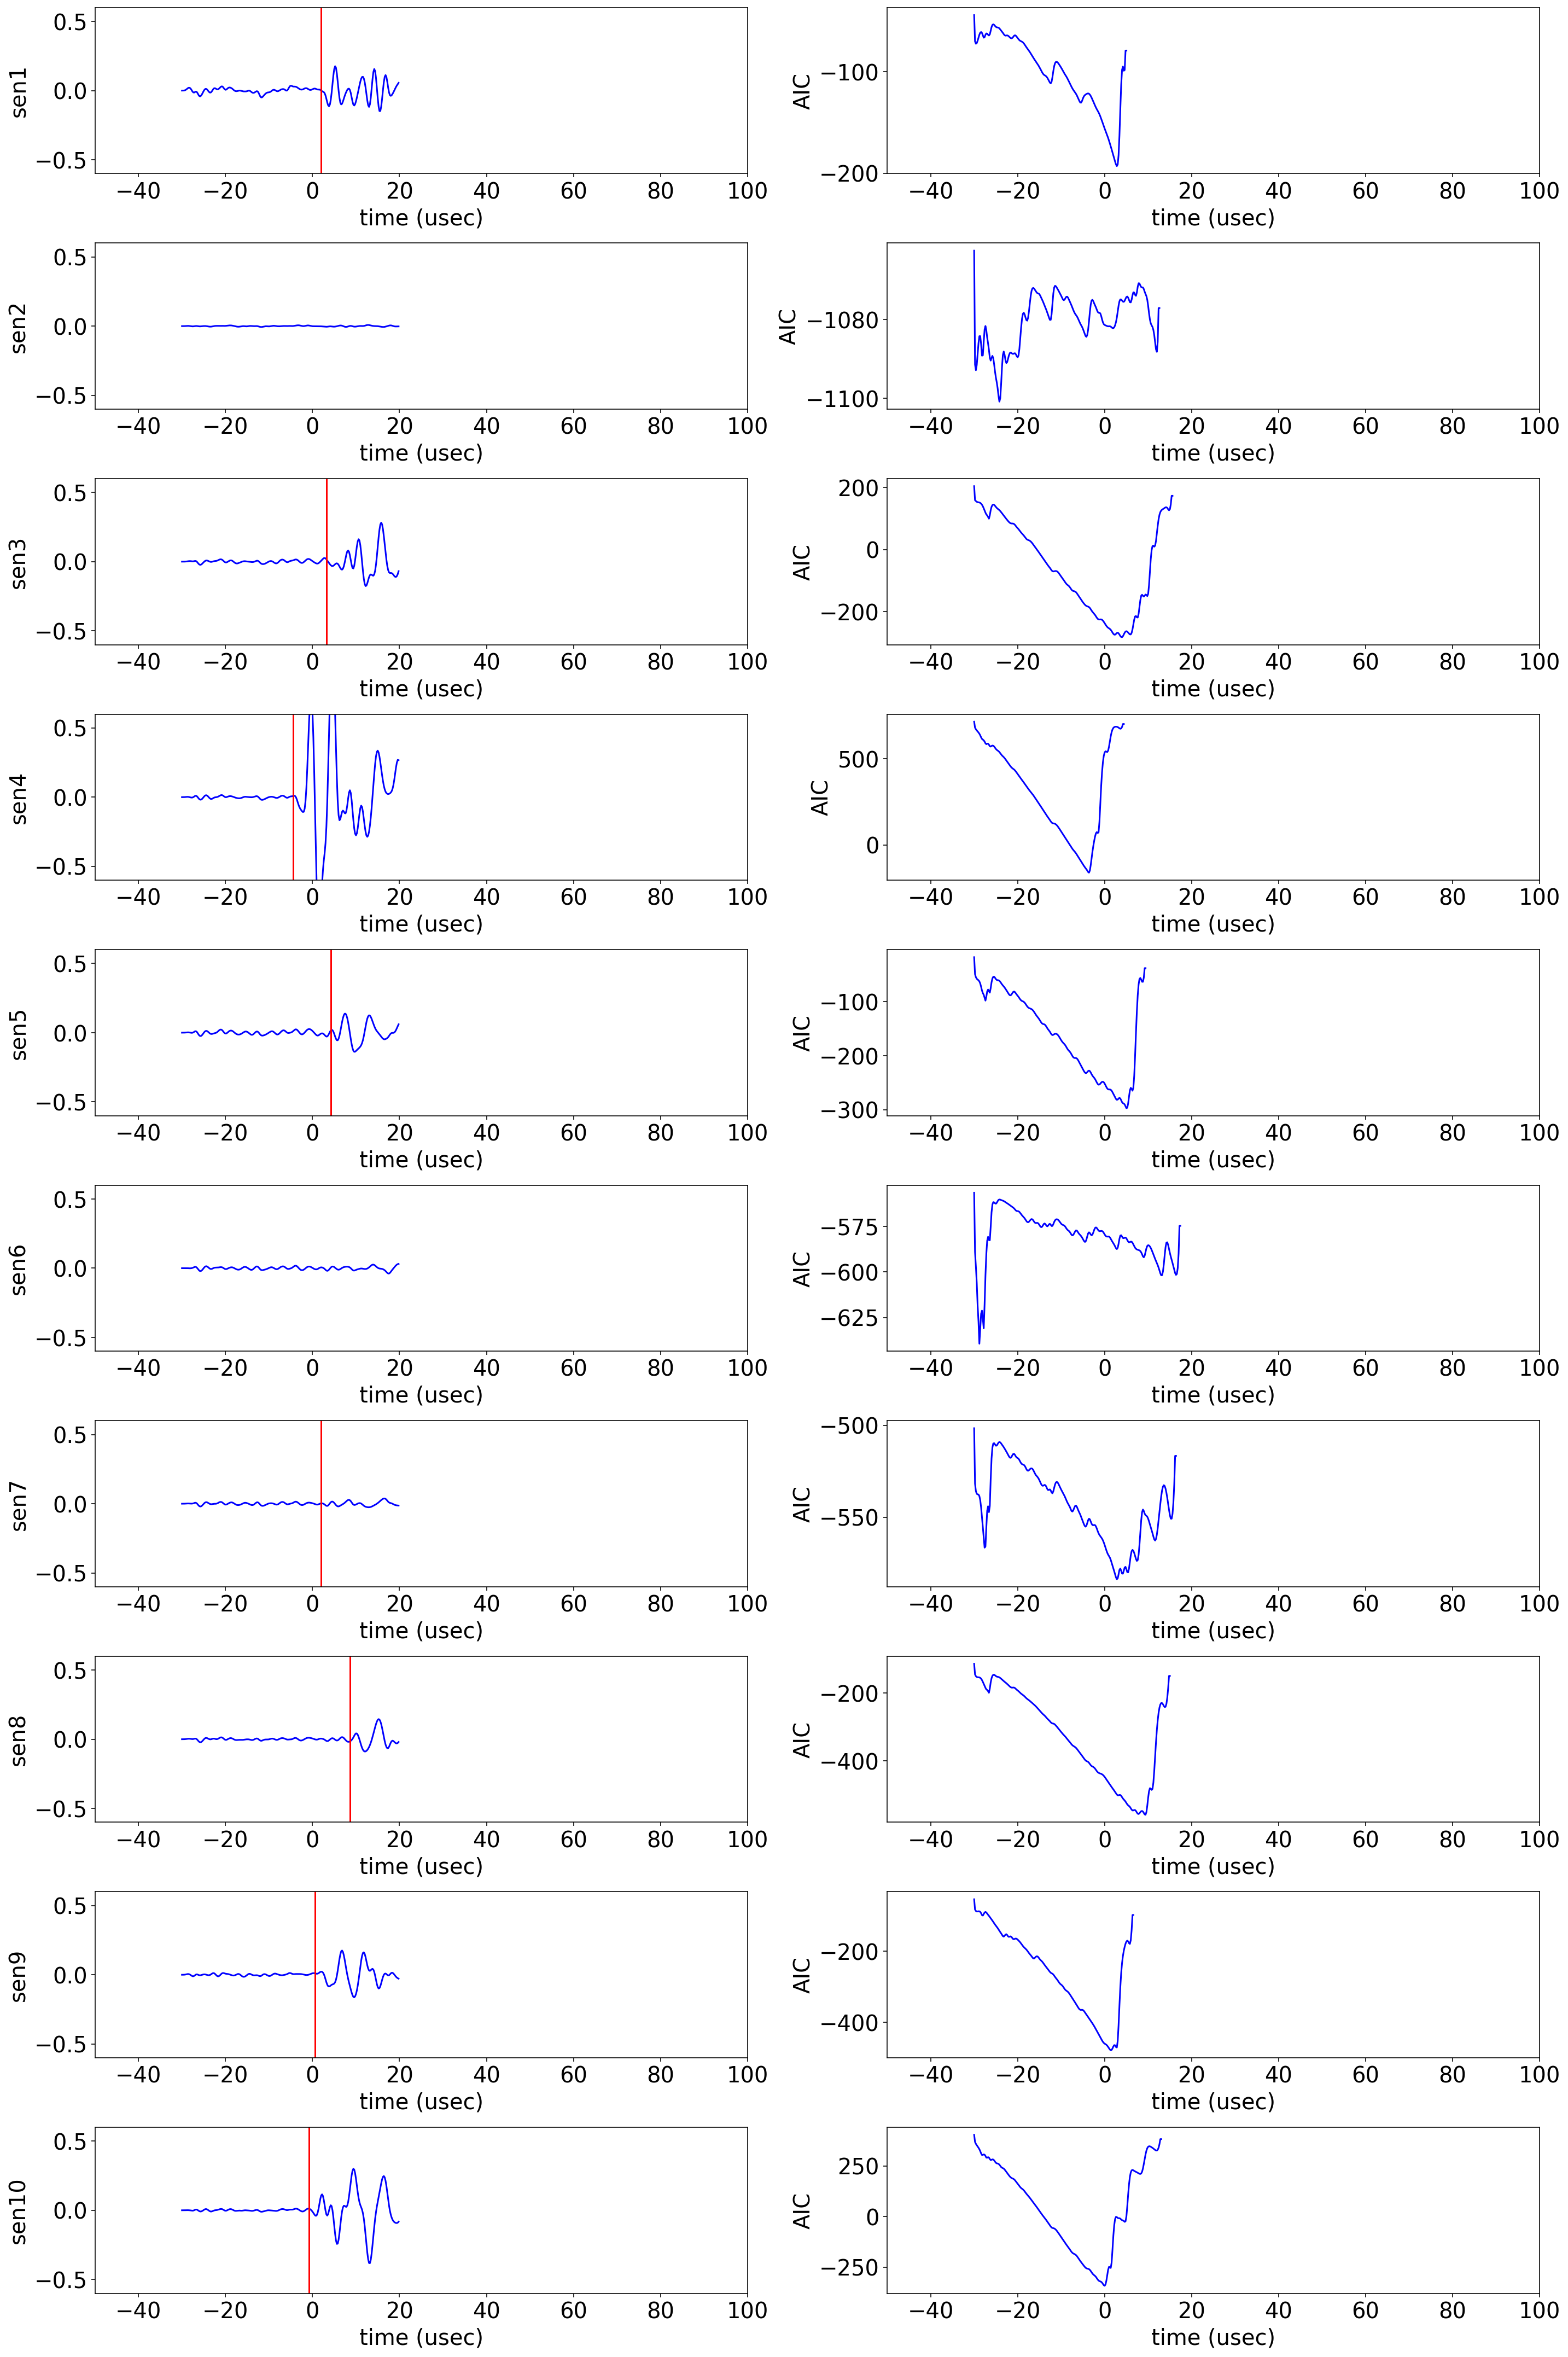

In [55]:
def aic_pick(t,x,o): # o string is for how to trim signal
    # only use part of signal, otherwise use entire signal
    if o == 'to_peak': # up to the peak amplitude
        ind_peak = np.nanargmax(np.absolute(x)) # get index of abs max 
        t = t[:ind_peak]
        x = x[:ind_peak]   
    elif o == 'peak_plus':
        ind_peak_plus = np.nanargmax(np.absolute(x))+100 # get index of abs max 
        t = t[:ind_peak_plus]
        x = x[:ind_peak_plus]    
    # generate a list
    x_lst = x.tolist()
    n = len(x_lst)
    a_lst = [] 
    if len(x_lst) != 0: # list (and array) not empty
        for i in range(n-1): # n-1 instead of n to avoid Warnings in variance computed for s2 (when only 1 element left)
            #compute variance (in mV) of first part
            s1 = 1000*np.var(x[0:i+1])
            if s1 <= 0:
                s1 = 0
            else:
                s1=np.log(s1)
            #compute variance (in mV) of second part
            s2 = 1000*np.var(x[i+1:n])
            if s2 <= 0:
                s2 = 0
            else:
                s2=np.log(s2)
            a_lst.append((i+1)*(s1) + (n-i-2)*(s2))   
    if len(a_lst) != 0: # empty?
        # duplicate last element in list to make it the same length as t and x
        a_lst.append(a_lst[-1])
        pick = np.nanargmin(np.asarray(a_lst))+1
        # note: there is a systematic lag between arrival and pick of roughly 1us
        return a_lst,(1000*t[pick]-0.001),t
    else:
        # return NaNs
        a_lst.append(np.nan)
        pick = np.nan
        return a_lst,pick,t

fig, axs = plt.subplots(10,2, figsize = (20, 30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

MIN = 348 # 9498 0 348
MAX = 598 # 10998 2497 598

file_name = df_trigger_times["file_name"][ind]
print(file_name)

p_list = []
for p in range(10):
    sense = "sen"+str(p+1)+"_v"

    t = df['time'].values
    x = df[sense].values
    # trim signal offset and start/end
    x = x - np.median(x)
    x = x[MIN:MAX]
    t = t[MIN:MAX]
    # skip traces that are noise
    if np.max(x)<0.09 and p!=1: # lower amplification for channel 2 of triaxial setup
        p_list.append([np.NaN,np.NaN])
        print('<09, ',p,np.max(x))
    else:
        if (np.max(x)>0.035 and p==1) or (p!=1): # lower amplification for channel 2 of triaxial setup
            print('>035 (p=1) or p!=1, ',p,np.max(x))
            fs = 5 * 10**6
            lowcut = 50 * 10**3
            highcut = 500 * 10**3
            y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)   

            limit = np.nanargmax(np.absolute(y))
            oh = 'to_peak'
            if oh == 'peak_plus':
                limit += 50
            aic_curve,arrival,t_trimmed = aic_pick(t,y,oh)
            # use peak-to-peak amplitude of aic curve as indicator of its quality
            aic_amp = np.nanmax(aic_curve) - np.nanmin(aic_curve)

            axs[p,0].plot(1e6*t, y, color = "blue")
            axs[p,0].set_xlabel("time (usec)")
            axs[p,0].set_ylabel(sense.split("_")[0]);
            axs[p,0].set_ylim([-0.6, .6])
            axs[p,0].set_xlim([-50, 100])  
            axs[p,1].plot(1e6*t_trimmed[0:limit], aic_curve[0:limit], color = "blue")
            axs[p,1].set_xlabel("time (usec)")
            axs[p,1].set_ylabel('AIC')
            axs[p,1].set_xlim([-50, 100])
            # all true events should arrive within this time window           
            if (arrival>-0.015)&(arrival<0.015)&(aic_amp>50):
                p_list.append([round(arrival,5),aic_amp])
                #tpick = [round(arrival,5),round(arrival,5)]
                tpick = [arrival*1e3,arrival*1e3]
                ypick = [-10,10]
                axs[p,0].plot(tpick, ypick, color = "red")
            else:
                p_list.append([np.NaN,np.NaN])
        else:
            p_list.append([np.NaN,np.NaN])
            print('<035, ',p,np.max(x))
p_arr = np.asarray(p_list)
print()
print('Picks for sensors 1-10: ',list(p_arr.T[0]))
print('AIC_amp: ',list(np.round(p_arr.T[1],1)))
print()

plt.tight_layout()    
plt.show()

## Make mental note of cutoff frequencies for optimized filter and save clean dataset

In [96]:
file_path = "datasets/a_python_processed/"+sample+"_df_trigger_times_cleaned.csv"
df_trigger_times.to_csv(file_path, index=False)

df_trigger_times.tail(10)

evnt_index                                         file_name  \
24096       98036  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98230.asd   
24097       98037  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98231.asd   
24098       98040  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98234.asd   
24099       98041  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98235.asd   
24100       98043  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98237.asd   
24101       98052  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98245.asd   
24102       98055  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98248.asd   
24103       98056  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98249.asd   
24104       98060  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98252.asd   
24105       98061  C:/Downloads/TRANSFER/Berea_TS7_5MPa_0_98253.asd   

       trigger_time  trigger_time_zeroed  diff_trig  pulse_flag  
24096  47066.521416          1784.521416   0.163678           0  
24097  47066.564226          1784.564226   0.042810           0  
24098  47066.568400          1784.568400   0.004160           0  
24099  47066.638245          1784.638245   0.069845           0  
24100  47066.676648          1784.676648   0.038398           0  
24101  47066.685499          1784.685499   0.008840           0  
24102  47066.883819          1784.883819   0.198308           0  
24103  47067.334586          1785.334586   0.450766           0  
24104  47067.423580          1785.423580   0.088986           0  
24105  47067.651867          1785.651867   0.228288           0